# AIPI 590 - XAI | Explainable Deep Learning
### Use a pretrained deep learning model to investigate model explainability in computer vision
### Mariam Khan


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mkhan13/XAI/blob/main/explainable_deep_learning.ipynb)

In [24]:
# Imports
import os
import torch
import torchvision.models as models
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam import GradCAMPlusPlus
from pytorch_grad_cam import ScoreCAM
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

### **Load Data**

In [ ]:
repo_name = "XAI"
branch_name = "explainable_deep_learning"
git_path = "https://github.com/Mkhan13/XAI.git"

# If repo already exists, remove it first to avoid conflicts
if os.path.exists(repo_name):
    !rm -rf {repo_name}

# Clone the branch
!git clone -b {branch_name} {git_path}

# Path to data folder
data_dir = os.path.join(repo_name, "data", "explainable_deep_learning")

# Verify files exist
print("Files in data folder:", os.listdir(data_dir))

Cloning into 'XAI'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 127 (delta 35), reused 11 (delta 11), pack-reused 61 (from 1)
Receiving objects: 100% (127/127), 12.48 MiB | 15.53 MiB/s, done.
Resolving deltas: 100% (50/50), done.
Files in data folder: ['speed.png', 'pedestrian.xml', 'pedestrian.png', 'stop_speed.xml', 'speed.xml', 'stop.png', 'stop.xml', 'traffic.png', 'stop_speed.png', 'traffic.xml']


### **Load Pretrained Model**



In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1) # Load pretrained resnet-50
model = model.to(device)
model.eval() # Put model in evaluation mode

### **Apply GradCAM**

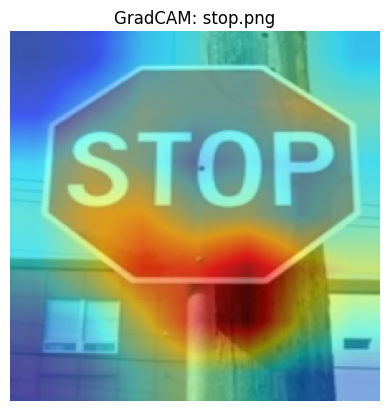

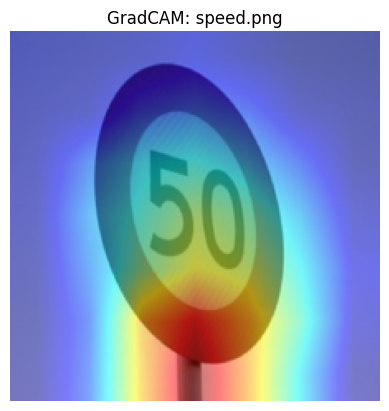

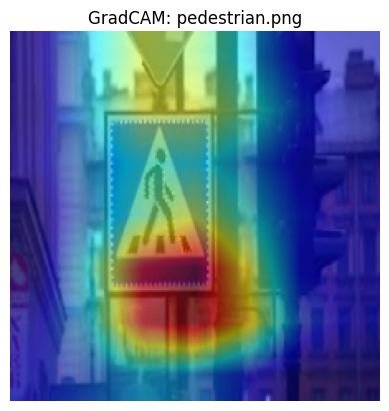

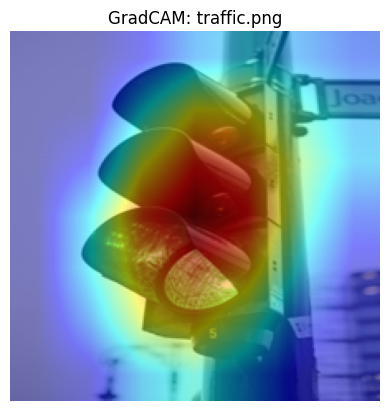

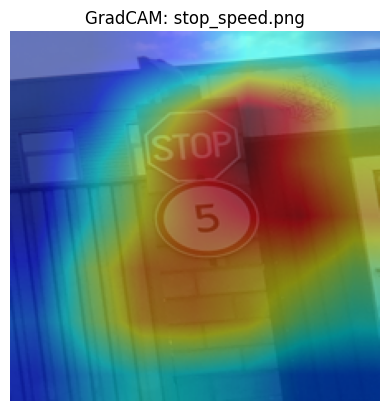

In [22]:
test_images = ["stop.png", "speed.png", "pedestrian.png", "traffic.png", "stop_speed.png"]

target_layers = [model.layer4[-1]] # Target layer for ResNet50

cam = GradCAM(model=model, target_layers=target_layers, reshape_transform=None) # Use GradCam

for img_name in test_images:
    img_path = os.path.join(data_dir, img_name)

    image = Image.open(img_path)
    image = image.convert("RGB") # Convert to RGB

    image = image.resize((224, 224)) # Resize to 224x224 for ResNet
    rgb_img = np.array(image, dtype=np.float32) / 255.0 # Convert to numpy array and normalize to (0,1)

    input_tensor = preprocess_image(
        rgb_img,
        mean=[0.485, 0.456, 0.406], # Imagenet mean
        std=[0.229, 0.224, 0.225] # Imagenet std
    )

    grayscale_cam = cam(input_tensor=input_tensor)[0, :] # Run GradCAM
    visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

    plt.imshow(visualization)
    plt.axis('off')
    plt.title(f"GradCAM: {img_name}")
    plt.show()

### **Apply GradCAM++**

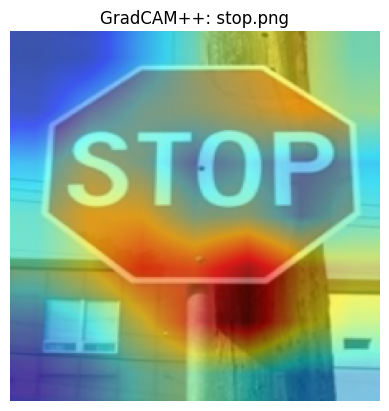

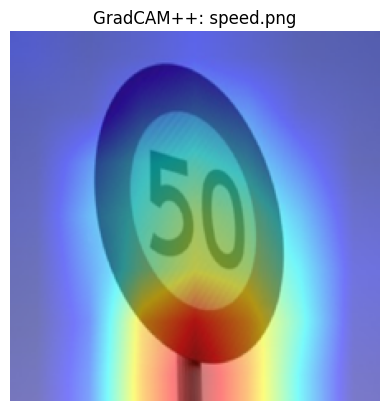

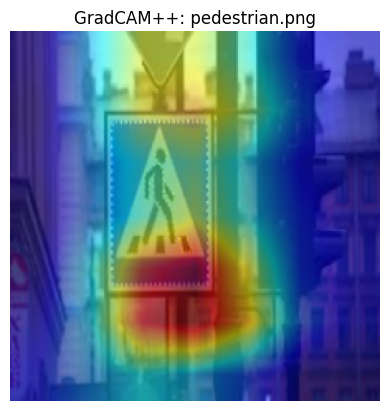

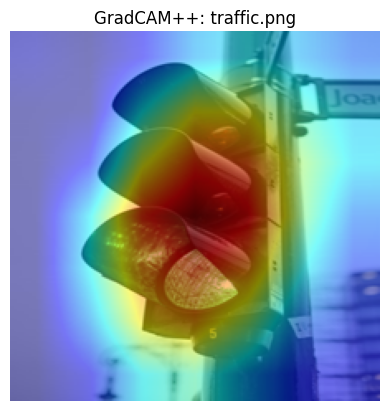

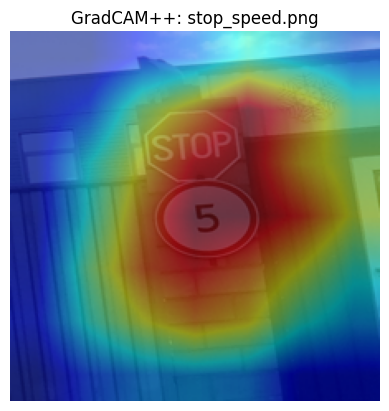

In [23]:
test_images = ["stop.png", "speed.png", "pedestrian.png", "traffic.png", "stop_speed.png"]

target_layers = [model.layer4[-1]] # Target layer for ResNet50

cam = GradCAMPlusPlus(model=model, target_layers=target_layers, reshape_transform=None) # Use GradCam++

for img_name in test_images:
    img_path = os.path.join(data_dir, img_name)

    image = Image.open(img_path)
    image = image.convert("RGB") # Convert to RGB

    image = image.resize((224, 224)) # Resize to 224x224 for ResNet
    rgb_img = np.array(image, dtype=np.float32) / 255.0 # Convert to numpy array and normalize to (0,1)

    input_tensor = preprocess_image(
        rgb_img,
        mean=[0.485, 0.456, 0.406], # Imagenet mean
        std=[0.229, 0.224, 0.225] # Imagenet std
    )

    grayscale_cam = cam(input_tensor=input_tensor)[0, :] # Run GradCAM++
    visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

    plt.imshow(visualization)
    plt.axis('off')
    plt.title(f"GradCAM++: {img_name}")
    plt.show()

### **Apply ScoreCAM**

100%|██████████| 128/128 [05:00<00:00,  2.35s/it]


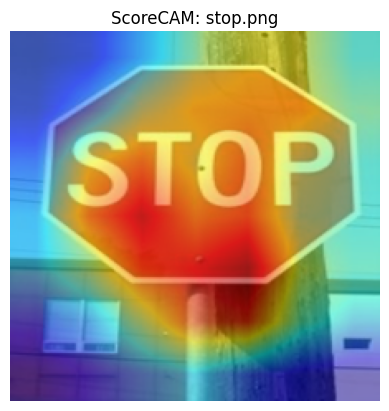

100%|██████████| 128/128 [04:50<00:00,  2.27s/it]


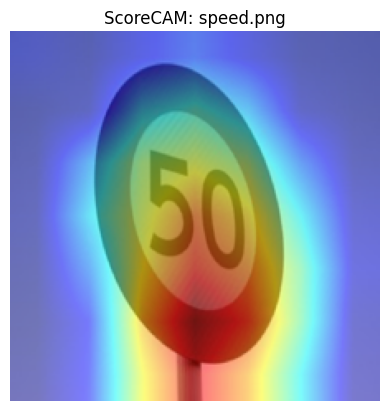

100%|██████████| 128/128 [05:03<00:00,  2.37s/it]


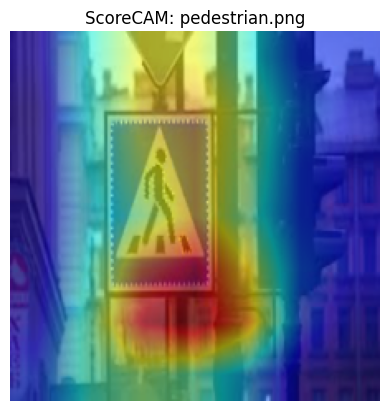

100%|██████████| 128/128 [04:11<00:00,  1.97s/it]


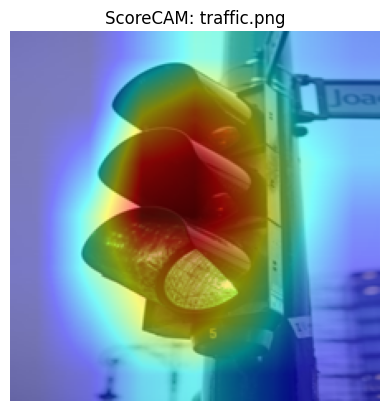

100%|██████████| 128/128 [04:29<00:00,  2.11s/it]


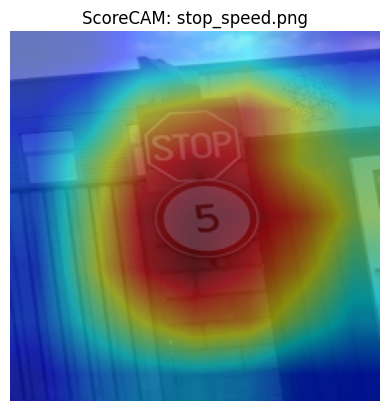

In [25]:
test_images = ["stop.png", "speed.png", "pedestrian.png", "traffic.png", "stop_speed.png"]

target_layers = [model.layer4[-1]] # Target layer for ResNet50

cam = ScoreCAM(model=model, target_layers=target_layers, reshape_transform=None) # Use ScoreCAM

for img_name in test_images:
    img_path = os.path.join(data_dir, img_name)

    image = Image.open(img_path)
    image = image.convert("RGB") # Convert to RGB

    image = image.resize((224, 224)) # Resize to 224x224 for ResNet
    rgb_img = np.array(image, dtype=np.float32) / 255.0 # Convert to numpy array and normalize to (0,1)

    input_tensor = preprocess_image(
        rgb_img,
        mean=[0.485, 0.456, 0.406], # Imagenet mean
        std=[0.229, 0.224, 0.225] # Imagenet std
    )

    grayscale_cam = cam(input_tensor=input_tensor)[0, :] # Run ScoreCAM
    visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

    plt.imshow(visualization)
    plt.axis('off')
    plt.title(f"ScoreCAM: {img_name}")
    plt.show()

### **Reflection**

The visualizations of the GradCAM, GradCAM++, and ScoreCAM on the road sign detection dataset show that all three methods are fairly successful at identifying the critical regions on the traffic signs and signals. This means the ResNet-50 pretrained model was appropriate for this task. For the stop sign, traffic signal, and cluster of stop and speed limit signs, it correctly focuses on the actual signs instead of the irrelevant background information. For the speed limit and pedestrian crossing signs, the model incorrectly puts more emphasis on the sign posts rather than the sign itself.

Both GradCAM and GradCAM++ show similar heatmaps to each other and have a smaller attention zone. Both miss key features, like the text and symbols in the center of the signs. ScoreCAM takes significantly longer to run but has a larger, more accurate attention zone that captures more of the key features of the signs.

It is interesting that for the traffic signal image, the attention zone was correctly centered around the active traffic signal instead of the entire structure. This shows the potential for the model understanding the behavior of the traffic signal, but further testing with other traffic signal images is needed to confirm this hypothesis.

These results are important for road saftey with autonomous driving because these systems make decisions that directly impact human lives. One misidentification of a traffic sign or signal by an autonomous vehicle can result in injury or death to other drivers or pedestrians on the road. The visualizations provide insight into what features the model thinks is important which can help keep the system accountable and able to be validated against real-world road safety requirements.